# Smart Sales Insights Using Spark

December 2024

## Component Versions

To run Spark locally on Windows, we must use specific versions.
See the README.md for more information.

-Python 3.10.11 (newest is 3.12.4 - which does NOT work)
-PySpark 3.5.3
-Spark 3.5.3
-JDK 17 (newer versions will NOT work)
-Winutils for Spark 3


## VS Code Extensions

1. Install VS Code Extension: Python by Microsoft
2. Install VS Code Extension: Jupyter by Microsoft

## Dependencies

The requirements.txt file must include:

pip
wheel
ipykernel
jupyterlab
pandas
matplotlib
seaborn
pyspark

Activate .venv and install dependencies before beginning.

## Notebook requirements

1. This notebook file must be named with .ipynb extension.
2. In the upper right, click Select Kernel and pick the local (.venv) option.

Jupyter: This notebook cell is of the type: Markdown.

In [75]:
# Jupyter: This notebook cell is of the type: Python.

# Jupyter Magic for Reloading Modules
%load_ext autoreload
%autoreload 2

# Standard Library Imports
from pathlib import Path
import sys

# External Imports
from pyspark.sql import SparkSession

# For local imports, temporarily add project root to Python sys.path
CURRENT_DIR = Path.cwd()
PROJECT_ROOT = CURRENT_DIR.parent

print(f"Current Directory: {CURRENT_DIR}")
print(f"Project Root: {PROJECT_ROOT}")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Local Script Imports
from scripts.step1_extract import read_csv                 # noqa: E402
from scripts.step2_transform import calculate_sales_count  # noqa: E402
from scripts.step3_load import save_to_csv_and_parquet     # noqa: E402
from scripts.step4_visualize import visualize_sales_count  # noqa: E402

# Initialize Spark Session
spark = SparkSession.builder.appName("Pipeline Notebook").getOrCreate()

# Define File Paths
data_dir = PROJECT_ROOT.joinpath("data")
products_file = data_dir.joinpath("prepared", "products_data_prepared.csv")
sales_file = data_dir.joinpath("prepared", "sales_data_prepared.csv")
output_dir = data_dir.joinpath("output")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current Directory: c:\Users\edaci\Documents\smart-sales-spark\notebooks
Project Root: c:\Users\edaci\Documents\smart-sales-spark


## Extract

In [76]:
# Extract: Read data from CSV files
products_df = read_csv(spark, products_file)
sales_df = read_csv(spark, sales_file)

# Display sample data
products_df.show()
sales_df.show()


2024-12-01 16:53:46.232 | INFO     | scripts.step1_extract:read_csv:29 - Attempting to read CSV file from: c:\Users\edaci\Documents\smart-sales-spark\data\prepared\products_data_prepared.csv
2024-12-01 16:53:46.286 | INFO     | scripts.step1_extract:read_csv:32 - Successfully read CSV file: c:\Users\edaci\Documents\smart-sales-spark\data\prepared\products_data_prepared.csv
2024-12-01 16:53:46.286 | INFO     | scripts.step1_extract:read_csv:33 - Schema of DataFrame:
None
2024-12-01 16:53:46.286 | INFO     | scripts.step1_extract:read_csv:29 - Attempting to read CSV file from: c:\Users\edaci\Documents\smart-sales-spark\data\prepared\sales_data_prepared.csv
2024-12-01 16:53:46.336 | INFO     | scripts.step1_extract:read_csv:32 - Successfully read CSV file: c:\Users\edaci\Documents\smart-sales-spark\data\prepared\sales_data_prepared.csv
2024-12-01 16:53:46.336 | INFO     | scripts.step1_extract:read_csv:33 - Schema of DataFrame:
None


root
 |-- ProductID: integer (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- UnitPrice: double (nullable = true)

root
 |-- TransactionID: integer (nullable = true)
 |-- SaleDate: date (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- ProductID: integer (nullable = true)
 |-- StoreID: integer (nullable = true)
 |-- CampaignID: integer (nullable = true)
 |-- SaleAmount: double (nullable = true)

+---------+-----------+-----------+---------+
|ProductID|ProductName|   Category|UnitPrice|
+---------+-----------+-----------+---------+
|      101|     laptop|Electronics|   793.12|
|      102|     hoodie|   Clothing|     39.1|
|      103|      cable|Electronics|    22.76|
|      104|        hat|   Clothing|     43.1|
|      105|   football|     Sports|    19.78|
|      106| controller|Electronics|    88.98|
|      107|     jacket|   Clothing|    67.02|
|      108|  protector|Electronics|    12.56|
+---------+-----------

## Transform

In [77]:
# Transform: Calculate sales count by product
sales_count_df = calculate_sales_count(products_df, sales_df)

# Display transformed data
sales_count_df.show()


2024-12-01 16:53:46.419 | INFO     | scripts.step2_transform:calculate_sales_count:28 - Starting transformation: calculating sales count by product.
2024-12-01 16:53:46.440 | INFO     | scripts.step2_transform:calculate_sales_count:38 - Transformation completed successfully.


+---------+----------+
|ProductID|sum(Count)|
+---------+----------+
|      108|      79.0|
|      101|     112.0|
|      103|      20.0|
|      107|     109.0|
|      102|      54.0|
|      105|      34.0|
|      106|      47.0|
|      104|      93.0|
+---------+----------+



## Load

In [78]:
# Load: Save results to CSV and Parquet
save_to_csv_and_parquet(sales_count_df, output_dir, "sales_count")


2024-12-01 16:53:46.536 | INFO     | scripts.step3_load:save_to_csv_and_parquet:26 - Starting the save operation for CSV and Parquet files.
2024-12-01 16:53:46.536 | INFO     | scripts.step3_load:save_to_csv_and_parquet:30 - Output directory created: c:\Users\edaci\Documents\smart-sales-spark\data\output
2024-12-01 16:53:46.536 | INFO     | scripts.step3_load:save_to_csv_and_parquet:33 - Converting Spark DataFrame to Pandas DataFrame.
2024-12-01 16:53:46.626 | INFO     | scripts.step3_load:save_to_csv_and_parquet:38 - Saving DataFrame to CSV at c:\Users\edaci\Documents\smart-sales-spark\data\output\sales_count.csv.
2024-12-01 16:53:46.626 | INFO     | scripts.step3_load:save_to_csv_and_parquet:43 - Saving DataFrame to Parquet at c:\Users\edaci\Documents\smart-sales-spark\data\output\sales_count.parquet.
2024-12-01 16:53:46.628 | INFO     | scripts.step3_load:save_to_csv_and_parquet:46 - Save operation completed successfully.


## Visualize

2024-12-01 16:53:46.667 | INFO     | scripts.step4_visualize:visualize_sales_count:32 - Loading data from CSV file: c:\Users\edaci\Documents\smart-sales-spark\data\output\sales_count.csv
2024-12-01 16:53:46.670 | INFO     | scripts.step4_visualize:visualize_sales_count:46 - Creating bar plot for sales count by product.
2024-12-01 16:53:46.770 | INFO     | scripts.step4_visualize:visualize_sales_count:68 - Visualization saved to: c:\Users\edaci\Documents\smart-sales-spark\data\output\sales_count_visualization.png


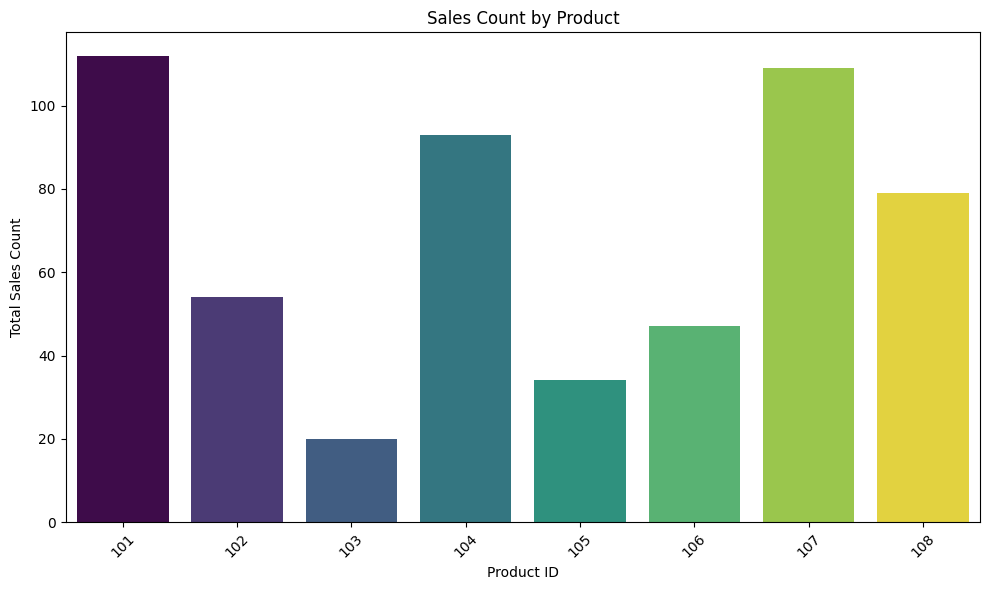

In [79]:
# Visualize: Create a bar plot of sales count by product
csv_path = output_dir / "sales_count.csv"
visualize_sales_count(csv_path)


The highest count products over this time frame were 101 and 107. 104 was also high, followed by 108. The lowest count was 103, followed by 105, 106, and 102. 

In [80]:
## Cubing Analysis

2024-12-01 16:53:46.889 | INFO     | scripts.step2_transform:cube_sales_by_date_and_store:73 - Cubing sales data by Year, Month, DayOfWeek, and StoreID.
2024-12-01 16:53:46.904 | INFO     | scripts.step2_transform:cube_sales_by_date_and_store:85 - Cubing completed successfully.
2024-12-01 16:53:46.904 | INFO     | scripts.step3_load:save_to_csv_and_parquet:26 - Starting the save operation for CSV and Parquet files.
2024-12-01 16:53:46.904 | INFO     | scripts.step3_load:save_to_csv_and_parquet:30 - Output directory created: c:\Users\edaci\Documents\smart-sales-spark\data\output
2024-12-01 16:53:46.904 | INFO     | scripts.step3_load:save_to_csv_and_parquet:33 - Converting Spark DataFrame to Pandas DataFrame.
2024-12-01 16:53:46.988 | INFO     | scripts.step3_load:save_to_csv_and_parquet:38 - Saving DataFrame to CSV at c:\Users\edaci\Documents\smart-sales-spark\data\output\cubed_sales_by_date_and_store.csv.
2024-12-01 16:53:46.988 | INFO     | scripts.step3_load:save_to_csv_and_parquet:

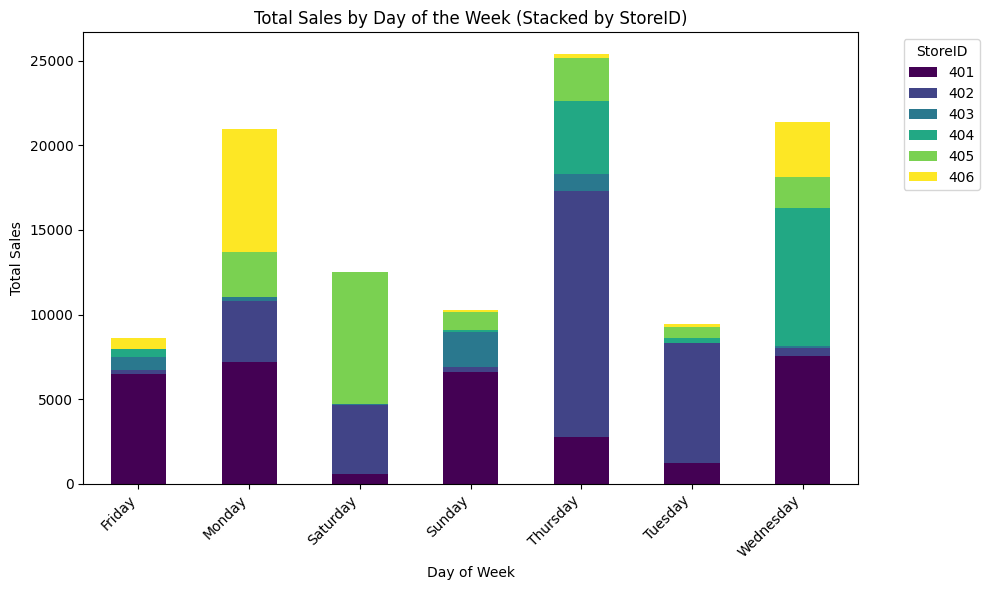

In [81]:
# import new functions
from scripts.step2_transform import cube_sales_by_date_and_store  # noqa: E402
from scripts.step4_visualize import visualize_cubed_sales_stacked  # noqa: E402

# we already got a sales_df Spark DataFrame above

# Transform
cubed_sales_by_date_and_store_df = cube_sales_by_date_and_store(sales_df)

# Load
save_to_csv_and_parquet(cubed_sales_by_date_and_store_df, output_dir, "cubed_sales_by_date_and_store")

# Visualize
visualize_cubed_sales_stacked(output_dir.joinpath("cubed_sales_by_date_and_store.csv"))
